### Objective: Build a Lie Detector Model

**Purpose:** Predict the future outcome for an individual in the program:
- **Complete Program Successfully:** 1
- **Discharge from the Program on Bad Terms:** 0

**Tasks:**

1. **Understanding the Distribution of Data:** 
   - Analyze key variables to identify their central tendencies and spread. This helps in understanding how the data is distributed, which is crucial for any form of modeling.

2. **Identifying Relationships Between Variables:**
   - Explore potential relationships between different variables using tools such as scatter plots, correlation matrices, and pivot tables. This helps in understanding which factors are most influential in determining the outcomes.

3. **Detecting Outliers:**
   - Identify and handle outliers in the data. Outliers can skew the results and could potentially lead to inaccurate models.

4. **Testing Assumptions:**
   - Verify the assumptions required for subsequent statistical tests and modeling. For instance, checking for normality if using techniques that assume normally distributed data.

5. **Visualizing Patterns and Trends:**
   - Use various visualization techniques to uncover hidden patterns and trends within the data. This can involve the use of line graphs, bar charts, and cluster diagrams.

6. **Generating Hypotheses:**
   - Based on initial findings, formulate hypotheses about the data which can later be tested using more detailed statistical models.

7. **Preparing for Further Analysis:**
   - Use insights from EDA to prepare the data further for modeling. This might include deciding on which features to include, which data transformations are necessary, and how best to split the data for training and testing.

**Columns and Their Acronyms:**
- **Permanency/Navigating Welfare System (PWS)**
- **Daily Living (DL)**
- **Self Care (SC)**
- **Relationships & Communication (RC)**
- **Housing & Money Management (HMM)**
- **Work & Study Life (WSL)**
- **Career & Education Planning (CEP)**
- **Looking Forward (LF)**



In [29]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

### ***Initial Exploration*** 

In [30]:
# Load the CSV file
thp_df2 = pd.read_csv("/Users/oakmoreroadinc./Desktop/Data Science /Portfolio Data Science /new_clean_norm.csv")

# Drop the 'Unnamed: 0' column
thp_df2.drop('Unnamed: 0', axis=1, inplace=True)

# Check the DataFrame to ensure the column has been removed
print(thp_df2.head())


   Youth ID Gender       PWS        DL        SC        RC       HMM  \
0         1      M -0.425201  0.113763  0.014711 -0.463621  0.147781   
1         2      M -0.156009  0.025946  0.208901  0.478853 -0.213461   
2         3      M  0.247779  0.377213 -0.179478  0.478853 -0.102310   
3         4      M -0.761690 -3.150093 -2.736307 -1.510815 -2.450383   
4         5      F  1.055354  0.465030  0.581098  0.583573 -0.699749   

        WSL       CEP        LF  total_score  Days_in_Program Category  \
0 -0.214315  1.236359  0.847431     1.256908              264     Good   
1  0.239044  0.135644 -0.931528    -0.212610              467     Good   
2  0.541284  0.147874 -0.042048     1.469166               49      Bad   
3 -2.329992 -2.298160 -2.265747   -17.503189              908     Good   
4  0.616843  0.967295  0.847431     4.416875              241      Bad   

   Result Score  fraud_alert     sigma  
0             1     0.211725  0.398059  
1             1    -0.031427 -0.067687  

In [31]:
#check for missing values 
#check data types
thp_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Youth ID         22 non-null     int64  
 1   Gender           22 non-null     object 
 2   PWS              22 non-null     float64
 3   DL               22 non-null     float64
 4   SC               22 non-null     float64
 5   RC               22 non-null     float64
 6   HMM              22 non-null     float64
 7   WSL              22 non-null     float64
 8   CEP              22 non-null     float64
 9   LF               22 non-null     float64
 10  total_score      22 non-null     float64
 11  Days_in_Program  22 non-null     int64  
 12  Category         22 non-null     object 
 13  Result Score     22 non-null     int64  
 14  fraud_alert      22 non-null     float64
 15  sigma            22 non-null     float64
dtypes: float64(11), int64(3), object(2)
memory usage: 2.9+ KB


In [ ]:
# 'thp_df2' contains 22 rows of youth data and assesment scores . 
# no youth's are missing information. 

In [32]:
#How Many data points do we have in each categorical variable?
thp_df2.value_counts(["Gender","Category"])

Gender  Category
M       Good        9
        Bad         7
F       Good        4
        Bad         2
dtype: int64

In [33]:
#another syntax for getting value counts
print(thp_df2[["Gender","Category"]].value_counts())

Gender  Category
M       Good        9
        Bad         7
F       Good        4
        Bad         2
dtype: int64


In [34]:
thp_df2.describe()

,Youth ID,PWS,DL,SC,RC,HMM,WSL,CEP,LF,total_score,Days_in_Program,Result Score,fraud_alert,sigma
count,22.000000,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,22.000000,22.000000,2.200000e+01,2.200000e+01
mean,11.500000,-3.835316e-16,9.083643e-16,-5.450186e-16,1.271710e-15,7.872491e-16,7.872491e-16,-1.362546e-16,1.857100e-15,4.279405e-15,475.363636,0.590909,-2.321375e-16,6.686570e-17
std,6.493587,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.176148e+00,282.466778,0.503236,1.000000e+00,1.000000e+00
min,1.000000,-2.174947e+00,-3.150093e+00,-2.736307e+00,-2.327626e+00,-2.450383e+00,-2.329992e+00,-2.298160e+00,-2.265747e+00,-1.750319e+01,49.000000,0.000000,-2.450257e+00,-1.823278e+00
25%,6.250000,-7.448658e-01,2.594585e-02,-6.042679e-01,-6.364083e-01,-4.878662e-01,-2.709853e-01,-7.724465e-01,-8.781589e-01,-2.884273e+00,244.000000,0.000000,-4.273414e-01,-4.295272e-01
50%,11.500000,4.588496e-02,2.454877e-01,3.059957e-01,4.788532e-01,-1.578855e-01,2.012641e-01,-5.392394e-02,4.026917e-01,1.363037e+00,469.500000,1.000000,1.694373e-01,7.085700e-02
75%,16.750000,1.004881e+00,4.760066e-01,6.781923e-01,8.139553e-01,3.388223e-01,7.301833e-01,9.672954e-01,8.474315e-01,4.403012e+00,694.000000,1.000000,6.129247e-01,7.539243e-01
max,22.000000,1.189950e+00,8.894770e-01,9.694766e-01,9.396185e-01,1.592749e+00,1.145763e+00,1.236359e+00,8.474315e-01,8.810825e+00,1026.000000,1.000000,1.254105e+00,1.536353e+00


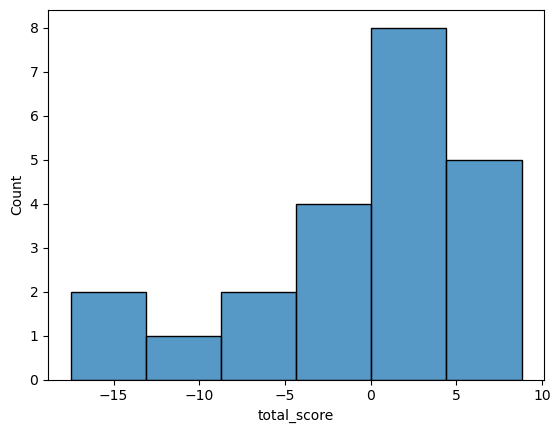

In [35]:
sns.histplot(data=thp_df2, x="total_score")
plt.show()

In [ ]:
# looks like assesment 'total_score' hovered around 32 to 40 for most youths in the dataset
# but a few youth's experienced very low assesment total scores of 22 to 30.

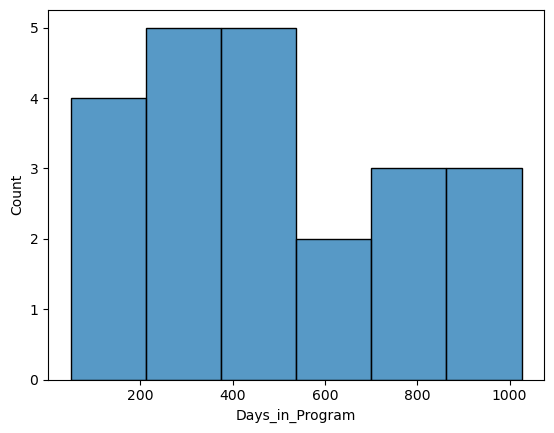

In [36]:
sns.histplot(data=thp_df2, x="Days_in_Program")
plt.show()

### **Most youth's spent at least 200 to 400 days in the program before exit.** 

### **A few youth's experienced 600 to 1000 days in the program before exit.**

## Data Validation 
###### Are data types and ranges are as expected? 


In [38]:
thp_df2.dtypes

Youth ID             int64
Gender              object
PWS                float64
DL                 float64
SC                 float64
RC                 float64
HMM                float64
WSL                float64
CEP                float64
LF                 float64
total_score        float64
Days_in_Program      int64
Category            object
Result Score         int64
fraud_alert        float64
sigma              float64
dtype: object

In [39]:
#validating categorical data
# is there a False in the list? 
thp_df2["Gender"].isin(["M", "F"])

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
Name: Gender, dtype: bool

In [40]:
## identifying values not on the list. Do you see a True?
~thp_df2["Gender"].isin(["M", "F"])

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
Name: Gender, dtype: bool

In [41]:
thp_df2[thp_df2["Gender"].isin(["M", "F"])].head()

,Youth ID,Gender,PWS,DL,SC,RC,HMM,WSL,CEP,LF,total_score,Days_in_Program,Category,Result Score,fraud_alert,sigma
0,1,M,-0.425201,0.113763,0.014711,-0.463621,0.147781,-0.214315,1.236359,0.847431,1.256908,264,Good,1,0.211725,0.398059
1,2,M,-0.156009,0.025946,0.208901,0.478853,-0.213461,0.239044,0.135644,-0.931528,-0.212610,467,Good,1,-0.031427,-0.067687
2,3,M,0.247779,0.377213,-0.179478,0.478853,-0.102310,0.541284,0.147874,-0.042048,1.469166,49,Bad,0,0.199038,-0.188250
3,4,M,-0.761690,-3.150093,-2.736307,-1.510815,-2.450383,-2.329992,-2.298160,-2.265747,-17.503189,908,Good,1,-2.450257,1.536353
4,5,F,1.055354,0.465030,0.581098,0.583573,-0.699749,0.616843,0.967295,0.847431,4.416875,241,Bad,0,0.615568,0.814614


In [42]:
# Define a Series describing whether each Categopry is not Bad.      
not_bad=~thp_df2["Category"].isin(["Bad"])
# Print 'thp_df2' without records related to youth in the 'Bad'category
print(thp_df2[not_bad])

    Youth ID Gender       PWS        DL        SC        RC       HMM  \
0          1      M -0.425201  0.113763  0.014711 -0.463621  0.147781   
1          2      M -0.156009  0.025946  0.208901  0.478853 -0.213461   
3          4      M -0.761690 -3.150093 -2.736307 -1.510815 -2.450383   
6          7      M -0.828988  0.201579  0.678192 -0.233239 -0.213461   
10        11      M -1.030882 -0.574135 -0.842959 -1.510815 -0.394082   
12        13      F  0.315077  0.201579  0.678192  0.248471 -0.213461   
13        14      F  1.189950  0.801660  0.969477  0.939619  1.592749   
14        15      M -0.223307  0.113763  0.111806 -0.107575 -0.588597   
15        16      F  1.122652  0.889477  0.872382  0.813955  1.467704   
16        17      M -0.694392  0.377213 -0.745864 -0.694004 -0.394082   
18        19      F -0.963584  0.479666  0.613462  0.939619  0.342296   
20        21      M -0.694392 -0.061871 -0.940054 -1.280433 -0.519128   
21        22      M -2.174947 -1.525483 -2.072826 -

In [43]:
#validating numerical data
#viewing only numerical columns 

thp_df2.select_dtypes("number").head()

,Youth ID,PWS,DL,SC,RC,HMM,WSL,CEP,LF,total_score,Days_in_Program,Result Score,fraud_alert,sigma
0,1,-0.425201,0.113763,0.014711,-0.463621,0.147781,-0.214315,1.236359,0.847431,1.256908,264,1,0.211725,0.398059
1,2,-0.156009,0.025946,0.208901,0.478853,-0.213461,0.239044,0.135644,-0.931528,-0.212610,467,1,-0.031427,-0.067687
2,3,0.247779,0.377213,-0.179478,0.478853,-0.102310,0.541284,0.147874,-0.042048,1.469166,49,0,0.199038,-0.188250
3,4,-0.761690,-3.150093,-2.736307,-1.510815,-2.450383,-2.329992,-2.298160,-2.265747,-17.503189,908,1,-2.450257,1.536353
4,5,1.055354,0.465030,0.581098,0.583573,-0.699749,0.616843,0.967295,0.847431,4.416875,241,0,0.615568,0.814614


## Summarizing Data 

In [44]:
thp_df2.head()

,Youth ID,Gender,PWS,DL,SC,RC,HMM,WSL,CEP,LF,total_score,Days_in_Program,Category,Result Score,fraud_alert,sigma
0,1,M,-0.425201,0.113763,0.014711,-0.463621,0.147781,-0.214315,1.236359,0.847431,1.256908,264,Good,1,0.211725,0.398059
1,2,M,-0.156009,0.025946,0.208901,0.478853,-0.213461,0.239044,0.135644,-0.931528,-0.212610,467,Good,1,-0.031427,-0.067687
2,3,M,0.247779,0.377213,-0.179478,0.478853,-0.102310,0.541284,0.147874,-0.042048,1.469166,49,Bad,0,0.199038,-0.188250
3,4,M,-0.761690,-3.150093,-2.736307,-1.510815,-2.450383,-2.329992,-2.298160,-2.265747,-17.503189,908,Good,1,-2.450257,1.536353
4,5,F,1.055354,0.465030,0.581098,0.583573,-0.699749,0.616843,0.967295,0.847431,4.416875,241,Bad,0,0.615568,0.814614


In [45]:
thp_df2.groupby("Gender").mean()

/var/folders/zx/f1n4qhss7qq5b_ypxdtf1xr00000gn/T/ipykernel_1982/3001256366.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  thp_df2.groupby("Gender").mean()


,Youth ID,PWS,DL,SC,RC,HMM,WSL,CEP,LF,total_score,Days_in_Program,Result Score,fraud_alert,sigma
Gender,,,,,,,,,,,,,,
F,12.833333,0.595485,0.477226,0.589189,0.723198,0.397871,0.574026,0.284444,0.690290,4.331730,359.5000,0.666667,0.584557,0.115306
M,11.000000,-0.223307,-0.178960,-0.220946,-0.271199,-0.149202,-0.215260,-0.106667,-0.258859,-1.624399,518.8125,0.562500,-0.219209,-0.043240


#### **AS you can see Females have higher total assesment & fraud_alert scores then Men.**

In [46]:
thp_df2.agg(["mean", "std"])

/var/folders/zx/f1n4qhss7qq5b_ypxdtf1xr00000gn/T/ipykernel_1982/606738719.py:1: FutureWarning: ['Gender', 'Category'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  thp_df2.agg(["mean", "std"])


,Youth ID,PWS,DL,SC,RC,HMM,WSL,CEP,LF,total_score,Days_in_Program,Result Score,fraud_alert,sigma
mean,11.500000,-3.835316e-16,9.083643e-16,-5.450186e-16,1.271710e-15,7.872491e-16,7.872491e-16,-1.362546e-16,1.857100e-15,4.279405e-15,475.363636,0.590909,-2.321375e-16,6.686570e-17
std,6.493587,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.176148e+00,282.466778,0.503236,1.000000e+00,1.000000e+00


In [47]:
#Creat a dict to specify aggregations for columns 
thp_df2.agg({"total_score":["mean", "std"], "fraud_alert":["median"]})

,total_score,fraud_alert
mean,4.279405e-15,NaN
std,7.176148e+00,NaN
median,NaN,0.169437


In [48]:
thp_df2.groupby("Category").agg(
    mean_total_score=("total_score", "mean"),
    std_total_score=("total_score" , "std"),
    median_fraud_alert=("fraud_alert", "median")
)


,mean_total_score,std_total_score,median_fraud_alert
Category,,,
Bad,3.060598,5.800691,0.604996
Good,-2.118875,7.469852,-0.217491


### Analysis of the 'Good' Category in Total Score

Upon examining the data, we find that the 'Good' category stands out in two significant ways:
1. **Lowest Average Total Score**: The 'Good' category has the lowest mean `total_score` among all categories.
2. **Largest Variation in Total Score**: This category also shows the greatest variability in `total_score`, indicating a wide range of scores within this group.


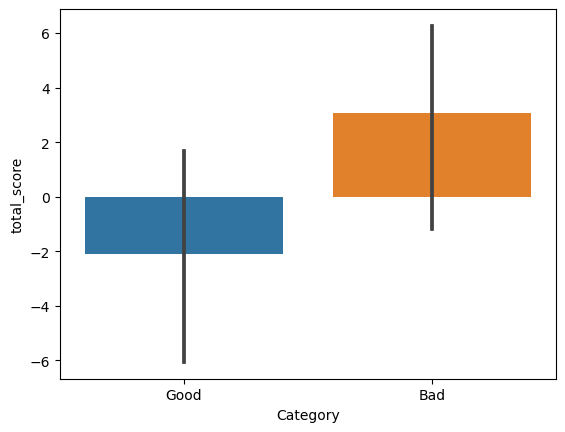

In [49]:
# create bar plot with confidence intervals for categorical data 
sns.barplot(data=thp_df2, x="Category", y="total_score")
plt.show()

### Bar Plot Analysis of the 'Good' Category

The bar plot analysis reveals two key insights about the 'Good' category:
1. **Lowest Grand Total**: Youth in the 'Good' category have the lowest `grand_total` compared to other categories.
2. **Smaller Confidence Interval**: The `total_score` for the 'Good' category shows a smaller confidence interval, suggesting that the average value is more consistent and reliable.

These findings highlight the distinct characteristics of the 'Good' category in terms of `total_score` performance.


/var/folders/zx/f1n4qhss7qq5b_ypxdtf1xr00000gn/T/ipykernel_1982/243899695.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= thp_df2.corr()


<Axes: >

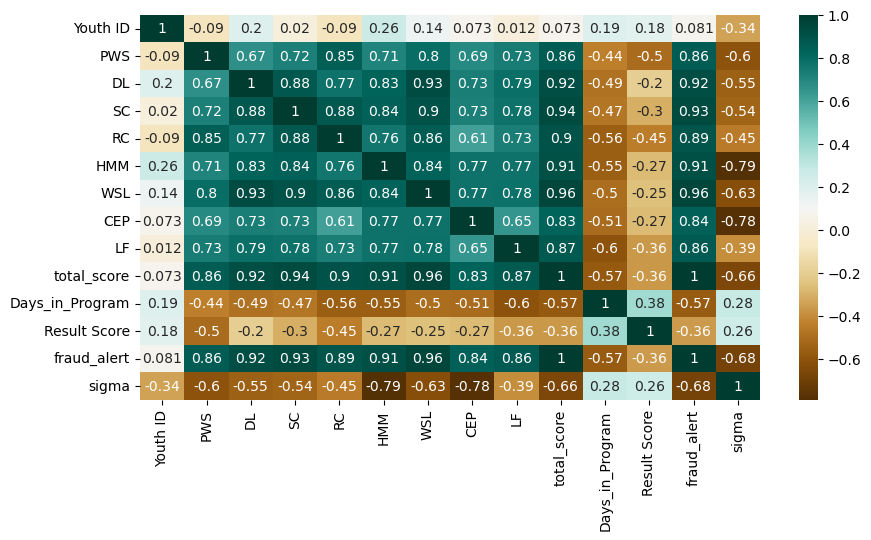

In [50]:
plt.figure(figsize=(10,5))
c= thp_df2.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

<Axes: xlabel='WSL', ylabel='fraud_alert'>

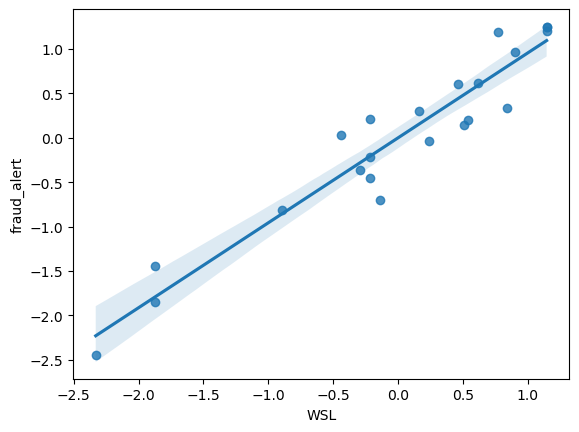

In [51]:
sns.regplot(x='WSL', y='fraud_alert', data=thp_df2)

In [52]:
import scipy.stats as stats

pearson_coef, p_value = stats.pearsonr(thp_df2['WSL'], thp_df2['fraud_alert'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.9565795578371012 with a P-value of P = 3.592356274788152e-12


### Statistical Analysis of "WSL" and "fraud_alert"

The Pearson correlation coefficient of 0.956579 indicates an extremely strong positive linear relationship between the variables "Work & Study Life (WSL)" and "fraud_alert." This high coefficient suggests that as "fraud_alert" increases, "WSL" also tends to increase, signifying a strong positive association between these two variables.

The p-value associated with this correlation is approximately 0.00000000000359, which is exceedingly small and well below the commonly used significance level of 0.05. This extremely low p-value indicates that the correlation observed is statistically significant and highly unlikely to have occurred by random chance.

Given that the p-value is less than 0.001, there is robust evidence supporting the significance of the correlation between "WSL" and "fraud_alert." This significant correlation suggests a meaningful and potentially impactful relationship, highlighting that changes in "fraud_alert" are closely linked to variations in "WSL."

<Axes: xlabel='LF', ylabel='fraud_alert'>

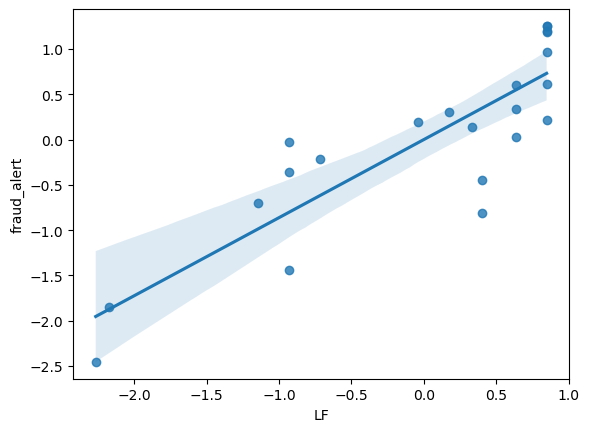

In [53]:
sns.regplot(x='LF', y='fraud_alert', data=thp_df2)


In [54]:
pearson_coef, p_value = stats.pearsonr(thp_df2['LF'], thp_df2['fraud_alert'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8620671455487848 with a P-value of P = 2.5147367244535875e-07


<Axes: xlabel='HMM', ylabel='fraud_alert'>

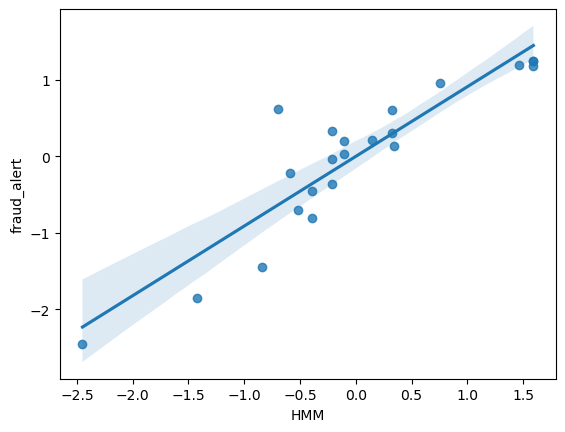

In [55]:
sns.regplot(x='HMM', y='fraud_alert', data=thp_df2)

In [56]:
pearson_coef, p_value = stats.pearsonr(thp_df2['HMM'], thp_df2['fraud_alert'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.9116835999719264 with a P-value of P = 3.6041150727500975e-09


In [57]:
thp_df2.columns

Index(['Youth ID', 'Gender', 'PWS', 'DL', 'SC', 'RC', 'HMM', 'WSL', 'CEP',
       'LF', 'total_score', 'Days_in_Program', 'Category', 'Result Score',
       'fraud_alert', 'sigma'],
      dtype='object')

In [58]:
#This will give you the success rates for males and females separately. Are the rates notiably different? 
male_success_rate = thp_df2[thp_df2['Gender'] == 'M']['Result Score'].mean()
female_success_rate = thp_df2[thp_df2['Gender'] == 'F']['Result Score'].mean()

print(f"Male Success Rate: {male_success_rate:.2f}")
print(f"Female Success Rate: {female_success_rate:.2f}")

Male Success Rate: 0.56
Female Success Rate: 0.67


In [59]:
#This will give you the fraud rates for males and females separately. Are the rates notiably different? 
male_fraud_rate = thp_df2[thp_df2['Gender'] == 'M']['fraud_alert'].mean()
female_fraud_rate = thp_df2[thp_df2['Gender'] == 'F']['fraud_alert'].mean()

print(f"Male fraud Rate: {male_fraud_rate:.2f}")
print(f"Female fraud Rate: {female_fraud_rate:.2f}")

Male fraud Rate: -0.22
Female fraud Rate: 0.58




### Summary of Findings

The analysis indicates a notable difference in the average "fraud_alert" values between males and females within the dataset. Specifically, males generally exhibit lower "fraud_alert" values, averaging 0.04, whereas females display higher averages, at 0.05. These figures represent the extent of the differences on the "fraud_alert" scale, highlighting a gender-based disparity in the dataset.

<Axes: xlabel='Category', ylabel='Days_in_Program'>

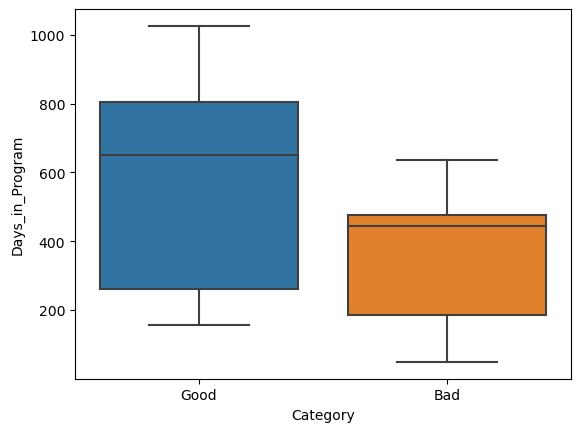

In [60]:
sns.boxplot(x='Category', y='Days_in_Program', data=thp_df2)

<Axes: xlabel='Category', ylabel='fraud_alert'>

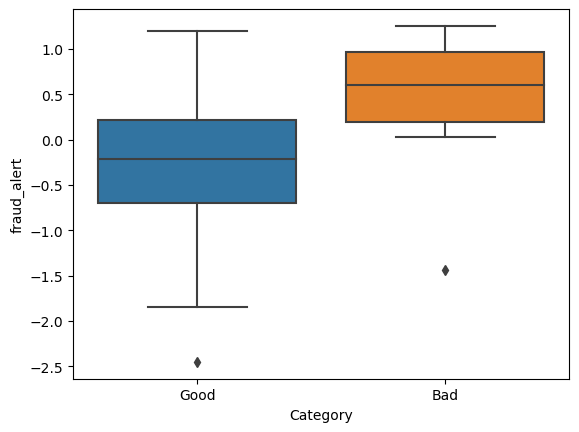

In [61]:
sns.boxplot(x='Category', y='fraud_alert', data=thp_df2)

### WSL is a potential perdictor for fraud_alert.

<Axes: xlabel='sigma', ylabel='fraud_alert'>

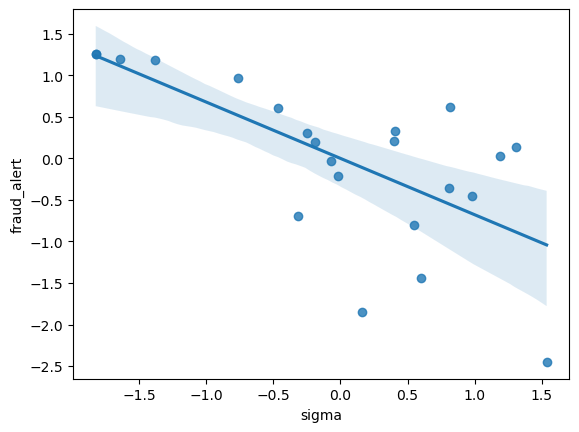

In [62]:
sns.regplot(x='sigma', y='fraud_alert', data=thp_df2)

<Axes: xlabel='HMM', ylabel='sigma'>

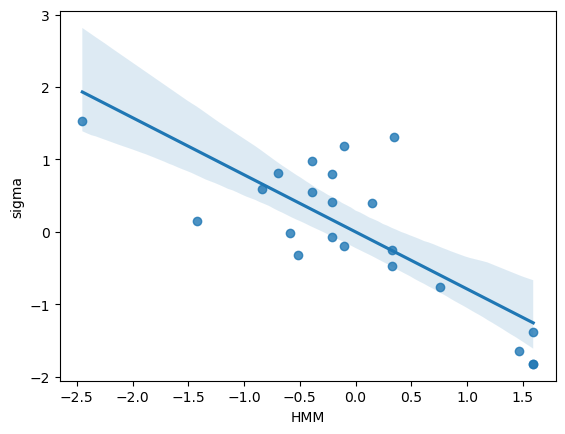

In [63]:
sns.regplot(x='HMM', y='sigma', data=thp_df2)

In [64]:
thp_df2[['sigma', 'Days_in_Program']].corr()

,sigma,Days_in_Program
sigma,1.000000,0.280747
Days_in_Program,0.280747,1.000000


<Axes: xlabel='Category', ylabel='PWS'>

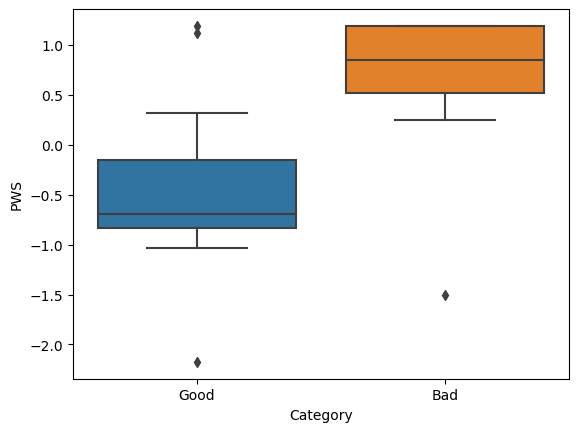

In [65]:
sns.boxplot(x='Category', y='PWS', data=thp_df2)

### Analysis Interpretation

The data suggests that youth who assessed themselves honestly and without bias tended to take the program more seriously, which correlated with greater success and longer tenure within the program. Conversely, those who assigned themselves higher scores, possibly under the misconception that higher scores would guarantee entry, generally had less successful outcomes, often resulting in discharge from the program. This pattern indicates that higher scores do not necessarily predict positive results; in fact, they may reflect a lack of self-awareness or unrealistic self-perceptions, leading to poorer performance in the program. Conversely, lower scores may indicate a more realistic self-assessment and a more earnest engagement with the program's objectives.

In [66]:
#Group by 'Category' and calculate mean of selected columns
category_groupby = thp_df2.groupby('Category')[['PWS', 'DL', 'SC', 'RC', 'HMM', 'WSL', 'CEP', 'LF', 'Days_in_Program','sigma','fraud_alert']].mean()
category_groupby

,PWS,DL,SC,RC,HMM,WSL,CEP,LF,Days_in_Program,sigma,fraud_alert
Category,,,,,,,,,,,
Bad,0.591746,0.234104,0.354543,0.523068,0.317595,0.296134,0.31502,0.428388,348.333333,-0.302104,0.421046
Good,-0.409670,-0.162072,-0.245453,-0.362124,-0.219874,-0.205016,-0.21809,-0.296576,563.307692,0.209149,-0.291494


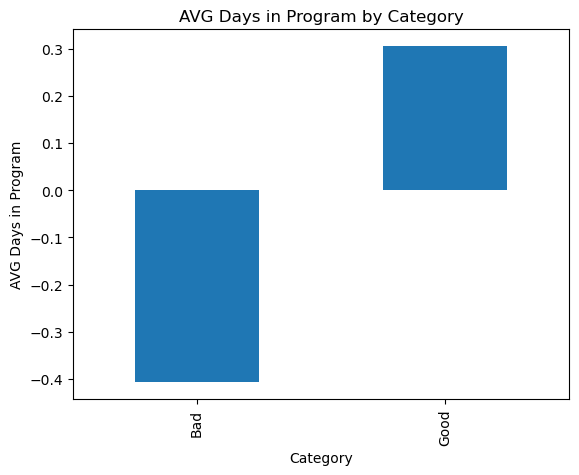

In [21]:
category_groupby['Days_in_Program'].plot(kind='bar', rot=90)
plt.ylabel('AVG Days in Program')
plt.title('AVG Days in Program by Category')
plt.show()

In [67]:
#Group by 'Gender' and calculate mean of selected columns
gender_groupby = thp_df2.groupby('Gender')[['PWS', 'DL', 'SC', 'RC', 'HMM', 'WSL', 'CEP', 'LF', 'Days_in_Program','sigma','fraud_alert']].mean()
gender_groupby

,PWS,DL,SC,RC,HMM,WSL,CEP,LF,Days_in_Program,sigma,fraud_alert
Gender,,,,,,,,,,,
F,0.595485,0.477226,0.589189,0.723198,0.397871,0.574026,0.284444,0.690290,359.5000,0.115306,0.584557
M,-0.223307,-0.178960,-0.220946,-0.271199,-0.149202,-0.215260,-0.106667,-0.258859,518.8125,-0.043240,-0.219209


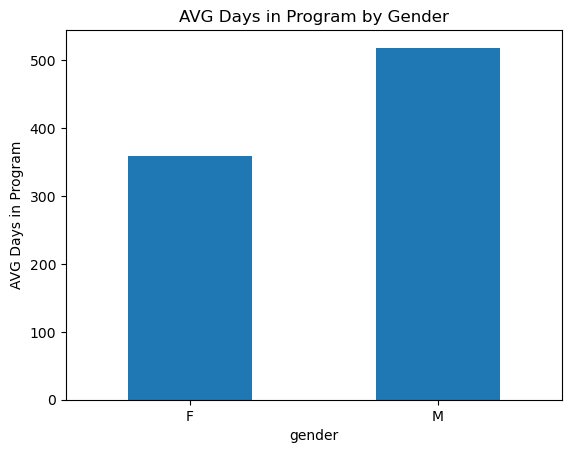

In [57]:
gender_groupby['days_spent'].plot(kind='bar', rot=360)
plt.ylabel('AVG Days in Program')
plt.title('AVG Days in Program by Gender')
plt.show()

In [68]:
thp_df2[['sigma', 'fraud_alert']].corr()

,sigma,fraud_alert
sigma,1.000000,-0.678098
fraud_alert,-0.678098,1.000000


In [69]:
thp_df2.describe()

,Youth ID,PWS,DL,SC,RC,HMM,WSL,CEP,LF,total_score,Days_in_Program,Result Score,fraud_alert,sigma
count,22.000000,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,22.000000,22.000000,2.200000e+01,2.200000e+01
mean,11.500000,-3.835316e-16,9.083643e-16,-5.450186e-16,1.271710e-15,7.872491e-16,7.872491e-16,-1.362546e-16,1.857100e-15,4.279405e-15,475.363636,0.590909,-2.321375e-16,6.686570e-17
std,6.493587,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.176148e+00,282.466778,0.503236,1.000000e+00,1.000000e+00
min,1.000000,-2.174947e+00,-3.150093e+00,-2.736307e+00,-2.327626e+00,-2.450383e+00,-2.329992e+00,-2.298160e+00,-2.265747e+00,-1.750319e+01,49.000000,0.000000,-2.450257e+00,-1.823278e+00
25%,6.250000,-7.448658e-01,2.594585e-02,-6.042679e-01,-6.364083e-01,-4.878662e-01,-2.709853e-01,-7.724465e-01,-8.781589e-01,-2.884273e+00,244.000000,0.000000,-4.273414e-01,-4.295272e-01
50%,11.500000,4.588496e-02,2.454877e-01,3.059957e-01,4.788532e-01,-1.578855e-01,2.012641e-01,-5.392394e-02,4.026917e-01,1.363037e+00,469.500000,1.000000,1.694373e-01,7.085700e-02
75%,16.750000,1.004881e+00,4.760066e-01,6.781923e-01,8.139553e-01,3.388223e-01,7.301833e-01,9.672954e-01,8.474315e-01,4.403012e+00,694.000000,1.000000,6.129247e-01,7.539243e-01
max,22.000000,1.189950e+00,8.894770e-01,9.694766e-01,9.396185e-01,1.592749e+00,1.145763e+00,1.236359e+00,8.474315e-01,8.810825e+00,1026.000000,1.000000,1.254105e+00,1.536353e+00


In [70]:
df_gptest=thp_df2[['Gender','Category', 'fraud_alert']]
grouped_test1=df_gptest.groupby(['Gender'], as_index=False).mean()
grouped_test1

/var/folders/zx/f1n4qhss7qq5b_ypxdtf1xr00000gn/T/ipykernel_1982/2831586917.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_test1=df_gptest.groupby(['Gender'], as_index=False).mean()


,Gender,fraud_alert
0,F,0.584557
1,M,-0.219209


#### Gender Analysis of Assessment Scores

On average, female youth appear more likely to inflate their assessment scores compared to male youth.


In [72]:
df_gptest=thp_df2[['Gender','Category', 'fraud_alert']]
grouped_test1=df_gptest.groupby(['Category',], as_index=False).mean()
grouped_test1

/var/folders/zx/f1n4qhss7qq5b_ypxdtf1xr00000gn/T/ipykernel_1982/218644555.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_test1=df_gptest.groupby(['Category',], as_index=False).mean()


,Category,fraud_alert
0,Bad,0.421046
1,Good,-0.291494


In [73]:
#Removing Outliers
# Calculate Q1, Q3 and IQR for each column
Q1 = thp_df2.quantile(0.25)
Q3 = thp_df2.quantile(0.75)
IQR = Q3 - Q1

# Define a mask for values that are not outliers
mask = ~((thp_df2 < (Q1 - 1.5 * IQR)) | (thp_df2 > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply the mask to get a DataFrame without outliers
remove_outliers = thp_df2[mask]

# Display the shape of the DataFrame without outliers
print(remove_outliers.shape)

(16, 16)


/var/folders/zx/f1n4qhss7qq5b_ypxdtf1xr00000gn/T/ipykernel_1982/2565625647.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = thp_df2.quantile(0.25)
/var/folders/zx/f1n4qhss7qq5b_ypxdtf1xr00000gn/T/ipykernel_1982/2565625647.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = thp_df2.quantile(0.75)
/var/folders/zx/f1n4qhss7qq5b_ypxdtf1xr00000gn/T/ipykernel_1982/2565625647.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  mask = ~((thp_df2 < (Q1 - 1.5 * IQR)

### Observational Insight

Youth with higher scores in the "fraud_alert" category generally tend not to complete the program.

In [80]:
thp_df2.to_csv("thp_explored.csv")

In [74]:
thp_df2.to_csv("thp_explored_rmv_outliers.csv")